<a href="https://colab.research.google.com/github/tschelli/Makeover_Visualization/blob/main/Makeover_Monday_Visualization_10_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Makeover Monday Project
Coding Dojo Practice Assignment
- Name: Tyler Schelling
- Date Started: 10/5/2022

Dataset pulled from [Makeover Monday](https://data.world/makeovermonday/2022w40) Week 40.

- Original Visualization:

<img src="https://mediauploads.data.world/6f572e4d68cbb5434bb85c518107371f670c795165a53882ccc588376e933f27_CleanShot_2022_09_28_at_12.13.36.png">

##Mount Drive | Import Libraries | Load Data

In [124]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [125]:
import pandas as pd
import numpy as np

import missingno as msno

import matplotlib.pyplot as plt
import seaborn as sns

import math

In [126]:
filename = '/content/drive/MyDrive/02. Life/Coding Dojo/00 Datasets/Income Inequality.xlsx'
df = pd.read_excel(filename)

## Exploring/Cleaning the data

In [127]:
df.head()

,COUNTRY CODE,COUNTRY,REGION,SUB-REGION,G7,INDICATOR,SUBJECT,YEAR,VALUE
0,AUS,Australia,Oceania,Australia and New Zealand,N,INCOME INEQUALITY,GINI,2012,0.326
1,AUS,Australia,Oceania,Australia and New Zealand,N,INCOME INEQUALITY,GINI,2014,0.337
2,AUS,Australia,Oceania,Australia and New Zealand,N,INCOME INEQUALITY,GINI,2016,0.330
3,AUS,Australia,Oceania,Australia and New Zealand,N,INCOME INEQUALITY,GINI,2018,0.325
4,AUT,Austria,Europe,Western Europe,N,INCOME INEQUALITY,GINI,2007,0.284


In [128]:
df['COUNTRY'].value_counts()

Canada                44
Finland               32
United Kingdom        18
Latvia                17
Portugal              16
Czechia               16
Lithuania             16
Slovenia              16
Greece                16
Slovakia              16
New Zealand           15
Ireland               15
Italy                 15
Bulgaria              14
Switzerland           14
Poland                14
Romania               14
Iceland               14
Hungary               14
Norway                13
Austria               13
Spain                 13
Costa Rica            12
South Korea           10
Germany                9
Israel                 9
Netherlands            9
Denmark                8
France                 8
Sweden                 8
Turkey                 7
United States          7
Estonia                7
Brazil                 5
Mexico                 5
Chile                  5
Luxembourg             5
Australia              4
Russian Federation     3
India                  2


In [129]:
plot_df = df.drop(columns = ['COUNTRY CODE', 'REGION', 'SUB-REGION', 'INDICATOR', 'SUBJECT'])
plot_df.head()

,COUNTRY,G7,YEAR,VALUE
0,Australia,N,2012,0.326
1,Australia,N,2014,0.337
2,Australia,N,2016,0.330
3,Australia,N,2018,0.325
4,Austria,N,2007,0.284


In [134]:
year_filter = (plot_df['YEAR'] >= 2017) & (plot_df['YEAR'] <= 2020)
plot_df = plot_df[year_filter]

In [135]:
plot_df = plot_df.sort_values('YEAR', ascending = False).drop_duplicates('COUNTRY', keep = 'first')
plot_df = plot_df.sort_values('VALUE', ascending = False).head(15)

##Reproducing the original visualization

In [136]:
color_map = []
for ind in plot_df.index:
    if plot_df.loc[ind, 'G7'] == 'Y':
        color_map.append('red')
    else:
        color_map.append('grey')

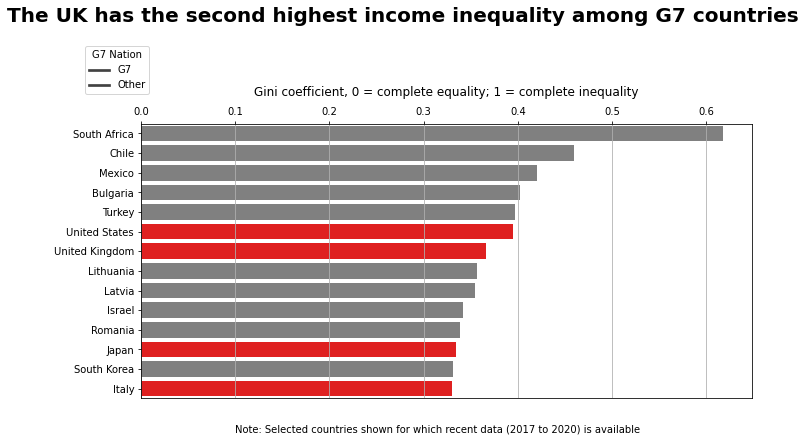

In [178]:
fig, axes = plt.subplots(figsize = (10,6))

sns.barplot(data = plot_df, x = 'VALUE', y = 'COUNTRY', palette = color_map)

fig.suptitle('The UK has the second highest income inequality among G7 countries', fontsize = 20, fontweight = 'bold', y = 1.03)
axes.set_title('Gini coefficient, 0 = complete equality; 1 = complete inequality', y = 1.08)

axes.xaxis.set_ticks_position('top')
axes.grid(axis='x')
axes.set(xlabel=None, ylabel=None)

axes.text(.1, 15.25, 'Note: Selected countries shown for which recent data (2017 to 2020) is available')

axes.legend(title = 'G7 Nation', loc='upper left', labels = ['G7', 'Other'], bbox_to_anchor=(-.1,1.3))
fig.tight_layout();

##Improving the plot